<a href="https://colab.research.google.com/github/King-Bowie/projeto_olimpiadas/blob/main/Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Olá a todes,
<h3>Neste projeto estamos analisando e explorando dados das olimpíadas de 1896 até 2016<h3>

<h5> Estes dados estão disponíveis em:</h5>
<a href="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results"> Kaggle - 120 years of Olympic history: athletes and results </a>

Já que o Github não permite o upload de "athlete_events.csv" então recomendo fazer o download no kaggle para ter a melhor experiência

In [182]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

atletas = pd.read_csv('athlete_events.csv')
atletas

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [183]:
atletas.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [184]:
atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


###Quantos dados possuimos?

In [185]:
print(f'No dataset de atletas temos {atletas.shape[0]} registros e {atletas.shape[1]} tipos de variáveis de classificação')

No dataset de atletas temos 271116 registros e 15 tipos de variáveis de classificação


###Quantos registro existem em cada ano?

In [186]:
atletas['Year'].value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

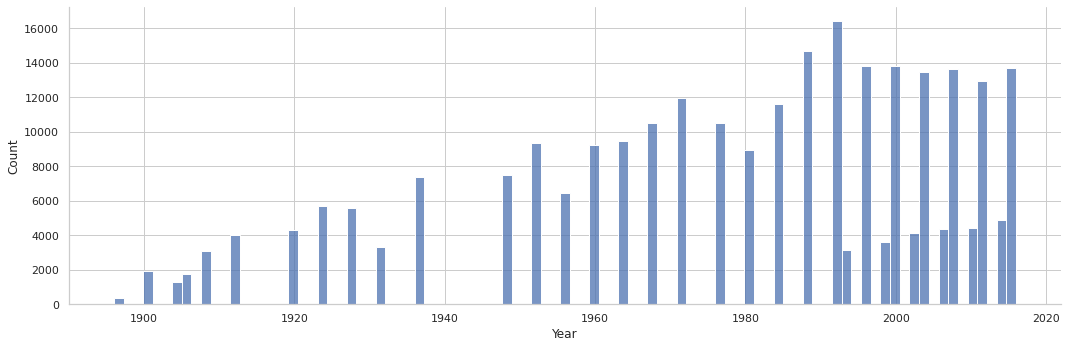

In [187]:
sns.displot(data = atletas, x="Year", kind='hist',aspect=3)

Neste gráfico podemos ver que as edições de 1916, 1940 e 1944 foram canceladas por causa das duas grandes guerras mundiais.

Para saber mais:
<href>https://www.olimpiadatododia.com.br/curiosidades-olimpicas/252485-olimpiadas-canceladas-2/</href>

###Qua é o total de participação por genero?

In [188]:
atletas['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

Text(0.5, 8.95999999999998, 'Sexo')

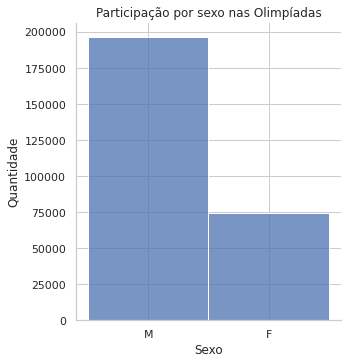

In [301]:
sns.displot(data=atletas, x="Sex", kind='hist')
plt.title('Participação por sexo nas Olimpíadas')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')

###Verificando os dados

In [190]:
atletas.isnull()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [191]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [192]:
atletas[atletas['Sport'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [193]:
atletas[atletas['City'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [194]:
atletas[atletas['Year'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [195]:
atletas[atletas['Sex'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [196]:
atletas[atletas['Weight'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


In [197]:
atletas[atletas['Height'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


In [198]:
atletas[atletas['Team'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [199]:
atletas[atletas['NOC'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [200]:
atletas[atletas['Games'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [201]:
sem_medadalha = atletas[atletas['Medal'].isnull()].shape[0]
sem_medadalha

231333

In [202]:
atletas['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [203]:
com_medalha = atletas[atletas['Medal'].notnull()].shape[0]
com_medalha

39783

Temos apenas em branco: peso, altura e medalhas. 
Não é no momento um problema então não serão eliminados mas sim aproveitados.

###Quais são os tipos de dados que iremos manipular? (por tabela)

In [204]:
tipos_de_dados = pd.DataFrame(data=atletas.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.columns.name = "Variáveis"
tipos_de_dados

Variáveis,Tipos de Dados
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


In [205]:
print(f'A base de dados apresenta {atletas.shape[0]} registros e {atletas.shape[1]} variáveis.')

A base de dados apresenta 271116 registros e 15 variáveis.


##Exploração de dados

###Quantas edições aconteceram durante 1896 até 2016? (por tabela)

In [206]:
jogos = atletas['Games']
epoca_dos_jogos = jogos.drop_duplicates()
epoca_dos_jogos = pd.DataFrame(epoca_dos_jogos)
epoca_dos_jogos.index = range(epoca_dos_jogos.shape[0])
epoca_dos_jogos.columns.name = "Id"
epoca_dos_jogos

Id,Games
0,1992 Summer
1,2012 Summer
2,1920 Summer
3,1900 Summer
4,1988 Winter
5,1992 Winter
6,1994 Winter
7,1932 Summer
8,2002 Winter
9,1952 Summer


###Qual é o total de pessoas que participaram em cada edição? (por tabela)

In [207]:
quantidade_de_atletas = pd.DataFrame(quantidade_de_atletas, columns = ["Atletas"])
quantidade_de_atletas.index.name = 'Edições'
quantidade_de_atletas['Atletas'] = jogos.value_counts()
quantidade_de_atletas

,Atletas
Edições,
2000 Summer,13821
1996 Summer,13780
2016 Summer,13688
2008 Summer,13602
2004 Summer,13443
1992 Summer,12977
2012 Summer,12920
1988 Summer,12037
1972 Summer,10304


###Qual é o total de pessoas que participaram em cada edição? (por gráfico)

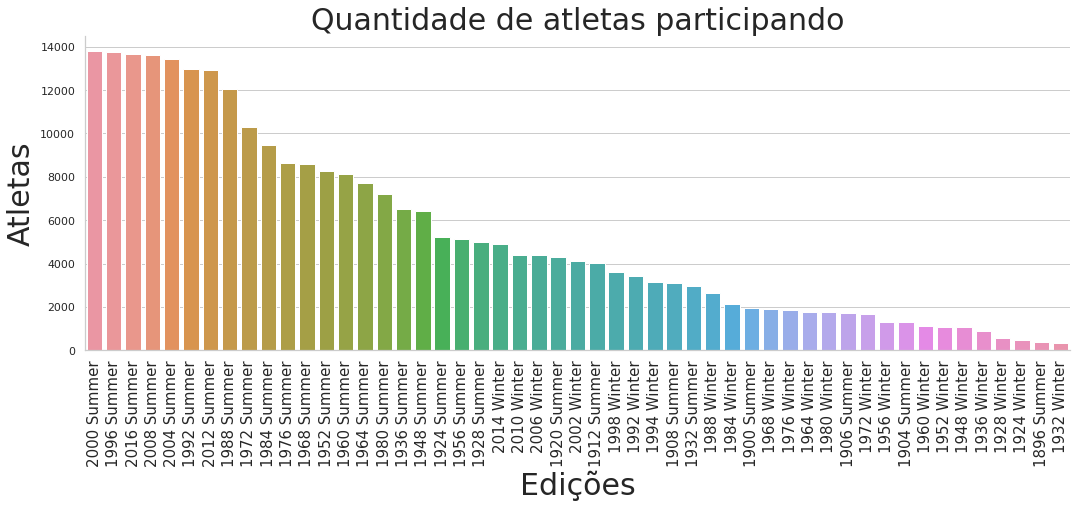

In [208]:
sns.catplot(kind='bar',
            data=quantidade_de_atletas,
            x=quantidade_de_atletas.index,
            y=quantidade_de_atletas['Atletas'],
            order=quantidade_de_atletas.index,
            aspect = 3,
            height = 5)
plt.title('Quantidade de atletas participando',fontsize= 30)
plt.xlabel('Edições', fontsize = 30)
plt.ylabel('Atletas', fontsize = 30)
plt.xticks(rotation = 90, fontsize=15)
plt.show()


###Como funciona a distribuição entre cada esporte?

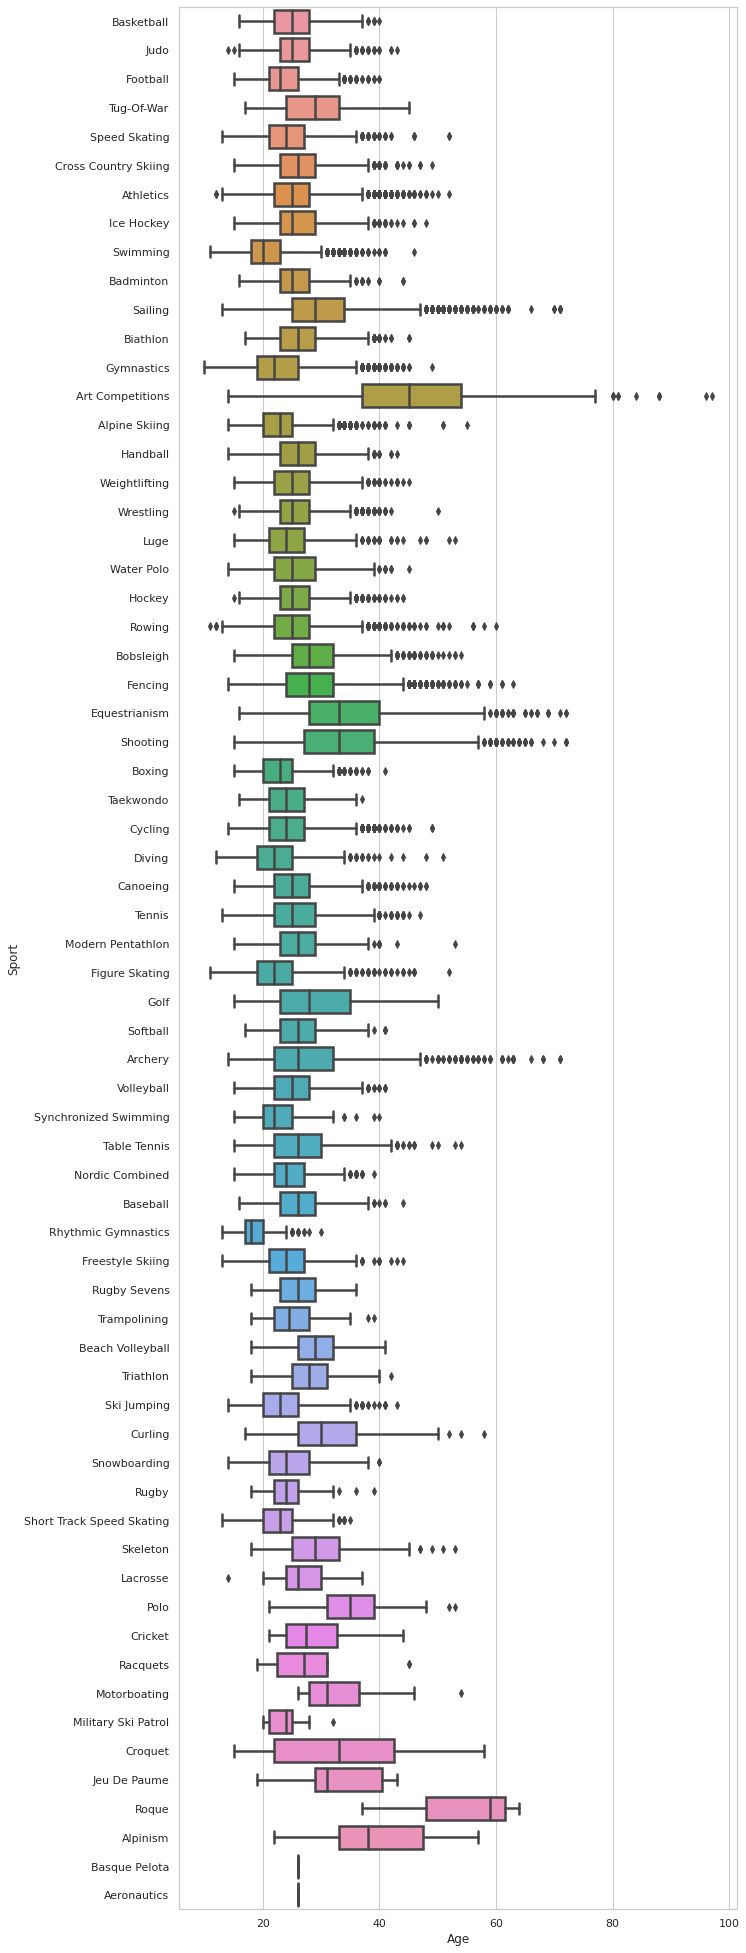

In [209]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,35))
sns.boxplot(x = 'Age',
            y ='Sport',
            data = atletas,
            linewidth=2.5)
plt.show()

###Como funciona a distribuição das medalhas? (por tabela e gráfico)

In [320]:
medalhas = ['Gold','Silver','Bronze']
selecao_bairro = atletas['Medal'].isin(medalhas)
novas_variaveis = atletas[selecao_bairro]
novas_variaveis

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [323]:
novas_variaveis['Medal'].unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

In [340]:
aa = novas_variaveis.groupby('Medal')

In [339]:
aa['Medal'].value_counts()

Medal   Medal 
Bronze  Bronze    13295
Gold    Gold      13372
Silver  Silver    13116
Name: Medal, dtype: int64

In [427]:
total_de_medalhas_ouro = novas_variaveis.loc[novas_variaveis['Medal']=='Gold']
total_de_medalhas_ouro.reset_index(inplace=True)
total_de_medalhas_ouro['Medal'].value_counts()

Gold    13372
Name: Medal, dtype: int64

In [426]:
total_de_medalhas_prata = novas_variaveis.loc[novas_variaveis['Medal']=='Silver']
total_de_medalhas_prata.reset_index(inplace=True)
total_de_medalhas_prata['Medal'].value_counts()

Silver    13116
Name: Medal, dtype: int64

In [419]:
total_de_medalhas_bronze = novas_variaveis.loc[novas_variaveis['Medal']=='Bronze']
total_de_medalhas_bronze.reset_index(inplace=True)
total_de_medalhas_bronze['Medal'].value_counts()

Bronze    13295
Name: Medal, dtype: int64

In [405]:
for medalha, dados in aa:
  print(dados)

            ID  ...   Medal
37          15  ...  Bronze
38          15  ...  Bronze
40          16  ...  Bronze
41          17  ...  Bronze
50          17  ...  Bronze
...        ...  ...     ...
271032  135535  ...  Bronze
271048  135545  ...  Bronze
271080  135553  ...  Bronze
271082  135554  ...  Bronze
271102  135563  ...  Bronze

[13295 rows x 15 columns]
            ID  ... Medal
3            4  ...  Gold
42          17  ...  Gold
44          17  ...  Gold
48          17  ...  Gold
60          20  ...  Gold
...        ...  ...   ...
270981  135503  ...  Gold
271009  135520  ...  Gold
271016  135523  ...  Gold
271049  135545  ...  Gold
271076  135553  ...  Gold

[13372 rows x 15 columns]
            ID  ...   Medal
63          20  ...  Silver
67          20  ...  Silver
86          25  ...  Silver
92          30  ...  Silver
106         38  ...  Silver
...        ...  ...     ...
271013  135522  ...  Silver
271015  135523  ...  Silver
271046  135544  ...  Silver
271078  135553  ..

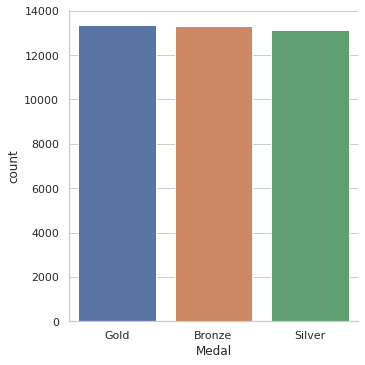

In [424]:
sns.catplot( kind='count',
             data = novas_variaveis['Medal'],
            x= novas_variaveis['Medal']
            )

###Faixa de idade por sexo das Olimpíadas (por gráfico)

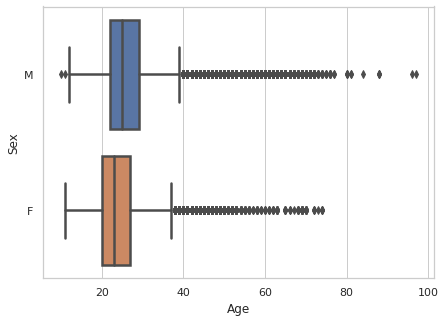

In [357]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,5))
sns.boxplot(x = 'Age',
            y ='Sex',
            data = atletas,
            linewidth=2.5)
plt.show()

###Faixa de idade entre edições das olimpíadas (por gráfico)

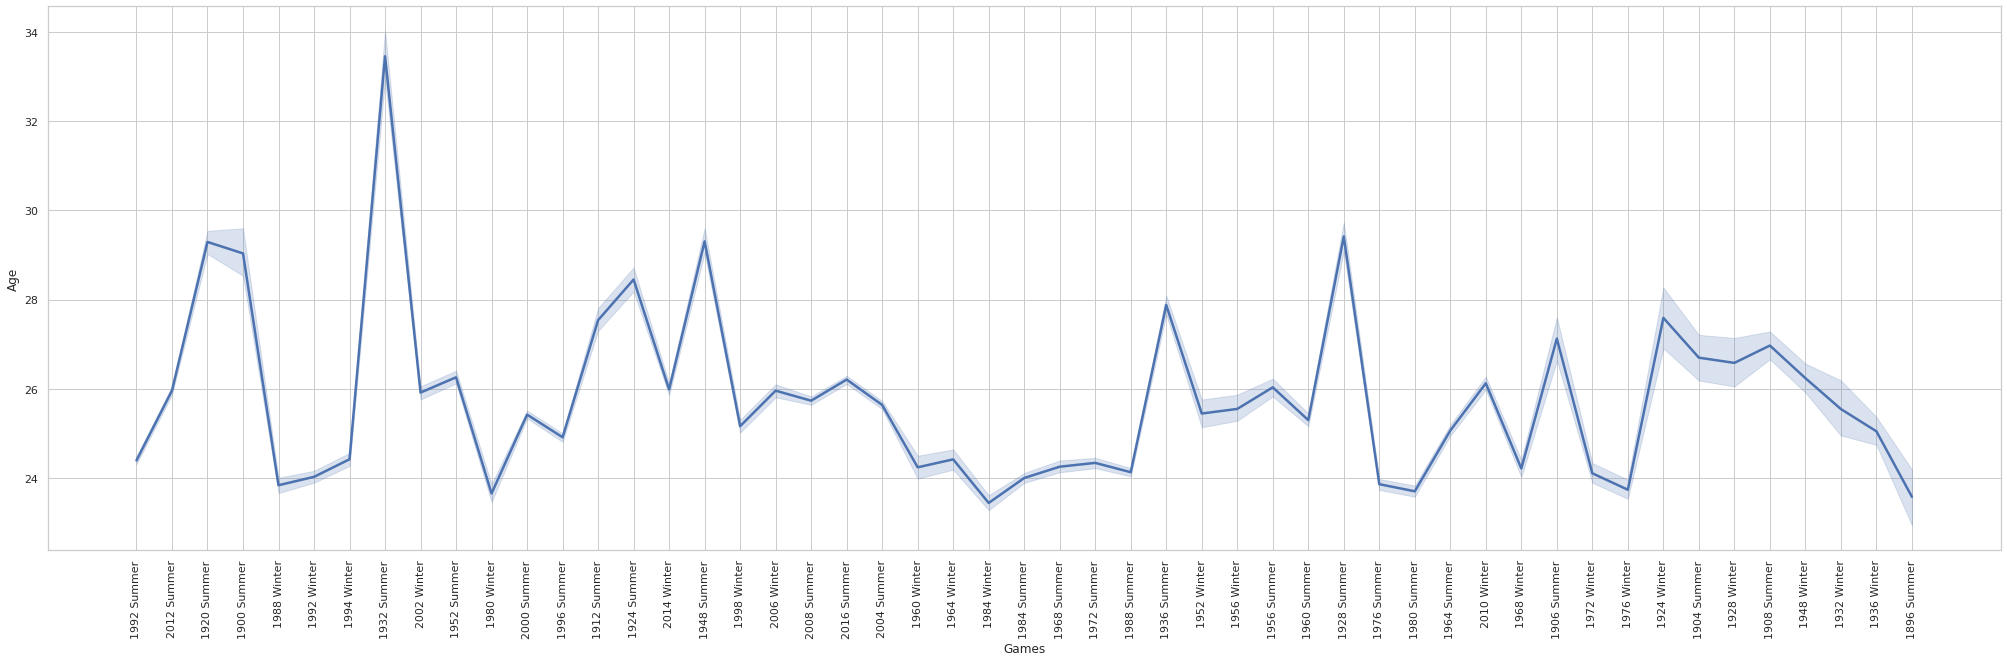

In [381]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(35,10))
sns.lineplot(x = 'Games',
            y ='Age',
            data = atletas,
            linewidth=2.5)
plt.xticks(rotation = 90)
plt.show()